In [34]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

# Mean

In [35]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [36]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [37]:
mean = sum(x)/len(x)
mean

8.7

In [38]:
statistics.mean(x)

8.7

In [39]:
statistics.mean(x_with_nan)

nan

In [40]:
np.mean(x)

8.7

In [41]:
y.mean()

8.7

# Weighted Mean

In [42]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

In [43]:
#weighted mean dengan menggabungkan sum dengan range atau zip
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [44]:
#Menggunakan np.average() untuk mendapatkan weighted mean dari array NumPy atau Series Pandas :
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights = w)
print(wmean)

wmean = np.average(z, weights = w)
print(wmean)

6.95
6.95


In [45]:
(w * y ).sum() / w.sum()

6.95

# Harmonic Mean

In [46]:
x = [8.0, 1, 2.5, 4, 28.0]
len(x) / sum(1 /item for item in x)

2.7613412228796843

In [47]:
statistics.harmonic_mean(x)

2.7613412228796843

In [48]:
scipy.stats.hmean(y)

2.7613412228796843

In [49]:
scipy.stats.hmean(z)

2.7613412228796843

# Geometric Mean

In [50]:
gmean = 1
for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [51]:
scipy.stats.gmean(y)

4.67788567485604

In [52]:
scipy.stats.gmean(z)

4.67788567485604

# Median

In [53]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5*n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
median_

4

In [54]:
# untuk data genap, median ada 2 yaitu median low dan median high
print(statistics.median_low(x[:-1])) #x = [8.0, 1, 2.5, 4]
print(statistics.median_high(x[:-1]))

2.5
4


# Modus

In [55]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]
max((u.count(item), item) for item in set(u))[1]

2

In [56]:
statistics.mode(u)

2

In [57]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int64
0    12
1    15
dtype: int64
0    2.0
dtype: float64


# Variance

In [58]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
var_


123.19999999999999

In [59]:
#dengan memanggil fungs statistics.variance()
print(statistics.variance(x))


#dengan NumPy
print(np.var(x, ddof=1))

123.2
123.19999999999999


# Standard Deviasi

In [60]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [61]:
#menggunakan statistics.stdev()
print(statistics.stdev(x))

#menggunakan NumPy -> fungsi std() dan method.std()
print(np.std(x, ddof=1))


11.099549540409287
11.099549540409285


# Skewness

In [62]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x ) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x)* n / ((n - 1) * (n - 2) * std_**3))
skew_


1.9470432273905929

In [63]:

y, y_with_nan = np.array(x), np.array(x_with_nan)
print(scipy.stats.skew(y, bias=False))
print(scipy.stats.skew(y_with_nan, bias=False))

z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(z.skew())

1.9470432273905927
nan
1.9470432273905924


# Data 2 dimensi

In [64]:

#Creating 2D NumPy array :
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])

In [65]:
print(np.mean(a))
print(a.mean())
print(np.median(a))
print(a.var(ddof=1))

5.4
5.4
2.0
53.40000000000001


In [66]:

print(np.mean(a, axis=0))
print(a.mean(axis=0))
print(np.mean(a, axis=1))
print(a.mean(axis=1))

[6.2 8.2 1.8]
[6.2 8.2 1.8]
[ 1.  2.  5. 13.  6.]
[ 1.  2.  5. 13.  6.]


In [67]:

print(np.median(a, axis=0))
print(np.median(a, axis=1))
print(a.var(axis=0, ddof=1))
print(a.var(axis=1, ddof=1))


[4. 3. 1.]
[1. 2. 4. 8. 1.]
[ 37.2 121.2   1.7]
[  0.   1.  13. 151.  75.]


In [68]:
#bekerja dengan fungsi statistik SciPy --> nilai default axis = 0
print(scipy.stats.gmean(a))
print(scipy.stats.gmean(a, axis=0))

[4.         3.73719282 1.51571657]
[4.         3.73719282 1.51571657]


In [76]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [77]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [75]:
#nilai tertentu dengan dot notation
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

# DataFrames

In [79]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [83]:
df.mean()


A    6.2
B    8.2
C    1.8
dtype: float64

In [84]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [85]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [86]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [88]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [89]:
df['A'].mean()

6.2

In [90]:
df['A'].var()

37.20000000000001

In [91]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [93]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [94]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [95]:
df.describe().at['mean', 'A']

6.2

In [96]:
df.describe().at['50%', 'B']

3.0

# visualization data

In [101]:
import matplotlib.pyplot as plt
#plt.style.use('gpplot')

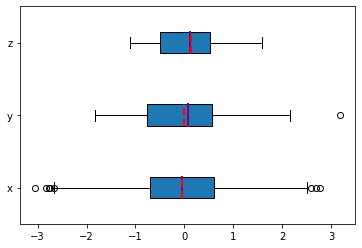

In [99]:
#Box Plots
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

fig, ax = plt.subplots()
ax.boxplot((x,y,z), vert=False, showmeans=True, meanline=True, labels=('x', 'y', 'z'), patch_artist=True,
 medianprops={'linewidth' : 2, 'color':'purple'}, 
 meanprops={'linewidth' : 2, 'color': 'red'})
plt.show()

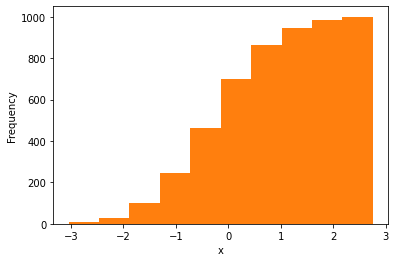

In [102]:
#Histograms
hist, bin_edges = np.histogram(x, bins=10)
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

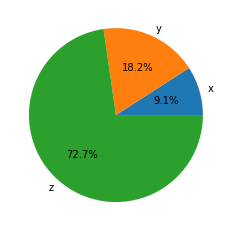

In [103]:
#Pie Charts
x,y,z = 128, 256, 1024

fig, ax = plt.subplots()
ax.pie((x,y,z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

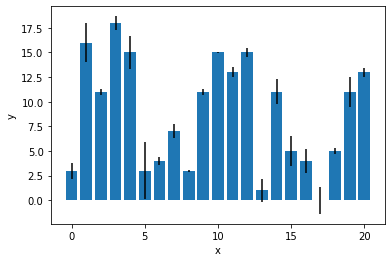

In [104]:
#Bar Charts
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

fig, ax = plt.subplots()
ax.bar(x,y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

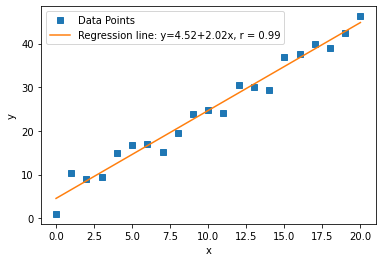

In [109]:
#X-Y Plots
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x,y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r = {r:.2f}'

fig, ax = plt.subplots()
ax.plot(x,y,linewidth = 0, marker = 's', label = 'Data Points')
ax.plot(x, intercept + slope * x, label = line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor = 'white')
plt.show()

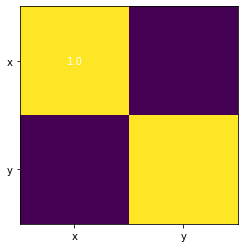

In [112]:
#Heatmaps
matrix = np.cov(x,y).round(decimals = 2)
matrix = np.corrcoef(x,y).round(decimals = 2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2) :
    for j in range(2):
        ax.text(j,i,matrix[i, j], ha='center', va='center', color='w')
        plt.show()